# Lagrange Interpolating Polynomials

## Manual Definitions

A simple illustration of Interpolation with Lagrange polynomials:

$$
L_k(x) = \prod_{i=0, i \neq k}^n \frac{\left(x-x_i\right)}{\left(x_k-x_i\right)}
$$
<br>

Let's choose $n=2$; define our Lagrange polynomials both explicitly and algorithmically.

$$
L_0(x) = \frac{(x - 2.5)(x - 4.0)}{(2.0 - 2.5)(2.0 - 4.0)} = x^2 - 6.5x + 10 \\
L_1(x) = \frac{(x - 2.0)(x - 4.0)}{(2.5 - 2.0)(2.5 - 4.0)} = \frac{-4x^2 + 24x - 32}{3} \\
L_2(x) = \frac{(x - 2.0)(x - 2.5)}{(4.0 - 2.0)(4.0 - 2.5)} = \frac{x^2 - 4.5x + 5}{3} \\
$$

In [1]:
import numpy as np

# k is the index of the lagrange polynomial
# pts are the locations where we have fixed values
# x is the point at which we're evaluating the polynomial
def L(k, pts, x):
    
    # initialize the product
    prod = 1.0
    
    # loop over the points, skipping i = k
    for i in range(len(pts)):
        if (i != k):
            prod = prod*(x - pts[i])/(pts[k] - pts[i])
    return prod

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


To combine the polynomials and actually compute an approximation, we use the formula:

$$
P(x) = \sum_{k=0}^2 f(x_k)L_k(x) \\
$$

First, we need to define a function to approximate and the three points at which to approximate it.

In [2]:
# use 1/x
def f(x):
    return 1.0/x

# choose 3 points
x_points = np.array([2.0, 2.5, 4.0])


Now, let's compute and look at each polynomial over $[0, 6]$.

In [3]:
import numpy as np

# Get a bunch of points at which to evaluate the polynomials
x = np.linspace(0.1, 10, 200)

# Get each lagrange polynomial (for n=2 case)
L0 = L(0, x_points, x)
L1 = L(1, x_points, x)
L2 = L(2, x_points, x)

Plot all three polynomials separately.

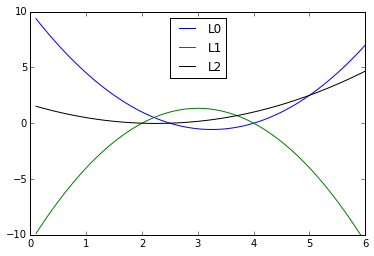

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x, L0, 'b')
plt.plot(x, L1, 'g')
plt.plot(x, L2, 'k')
plt.axis([0, 6, -10, 10])
plt.legend(("L0", "L1", "L2"), loc="upper center")

Now let's combine the polynomials, plot the output, and compare to $f(x)$ itself. 

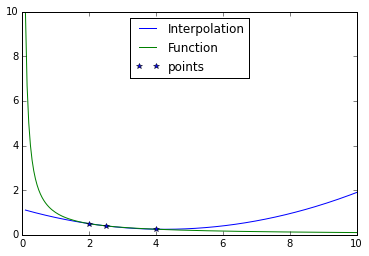

In [5]:
# We take the function evaluated at each of our chosen locations and multiply by our computed polynomials
P = f(x_points[0])*L0 + f(x_points[1])*L1 + f(x_points[2])*L2

# This is just the function evaluation
F = f(x)
f_vals = f(x_points)

plt.plot(x, P, 'b')
plt.plot(x, F, 'g')
plt.plot(x_points, f_vals, '*')
plt.legend(("Interpolation", "Function", "points"), loc="upper center")

## Using SciPy

But isn't Python supposed to be super useful? Can't we just do all of that in Python?

YES, we can. SciPy () has a Lagrange polynomial interpolation function.

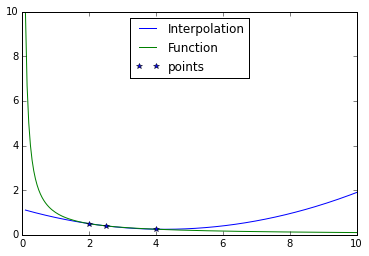

In [6]:
import scipy.interpolate as interp

# evaulate the function at our chosen 3 points
f_vals = f(x_points)

# Get the interpolating polynomial
P_scipy = interp.lagrange(x_points, f_vals)

# Evaluate the polynomial at our many x locations to get a smooth line
vals_scipy = P_scipy(x)

plt.plot(x, vals_scipy, 'b')
plt.plot(x, F, 'g')
plt.plot(x_points, f_vals, '*')
plt.legend(("Interpolation", "Function", "points"), loc="upper center")

## Unknown Functions

Ideally we'd like to be able to approximate data for which we don't already know the function. What might that look like?

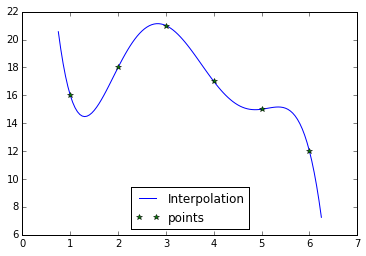

In [7]:
# We've got 7 points where we'll look (meaning n=7)
x2_points = np.arange(1,7)

# our function evaluations (data)
f2_vals = [16, 18, 21, 17, 15, 12]

# and we'll evaluate our end polynomial at these many points
x = np.arange(0.75, 6.30, 0.05)

# compute the polynomial at the points of interest.
P = 0
for i in range(len(x2_points)):
    P = P + f2_vals[i]*L(i, x2_points, x)
    
plt.plot(x, P, 'b')
plt.plot(x2_points, f2_vals, 'g*')
plt.legend(("Interpolation", "points"), loc="lower center")